In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import mplfinance as mpf


In [25]:
# Nome da ação a ser analisada
ticker = input("Insira a sigla da ação: ")

Insira a sigla da ação:  VALE


In [131]:
# Importação dos dados da ação escolhida
end_data = datetime.now().strftime('%Y-%m-%d')
data = yf.download(ticker, start='2020-01-01', end = end_data)
data


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,13.31,13.47,13.29,13.45,9.136027,19410400
2020-01-03,13.23,13.45,13.23,13.29,9.027346,17770000
2020-01-06,13.08,13.20,13.05,13.14,8.925459,19213300
2020-01-07,13.05,13.31,13.04,13.23,8.986590,18859600
2020-01-08,13.18,13.37,13.12,13.22,8.979797,24916400
...,...,...,...,...,...,...
2024-07-02,11.10,11.18,10.99,11.14,11.140000,25738000
2024-07-03,11.37,11.67,11.36,11.61,11.610000,32405900
2024-07-05,11.52,11.66,11.45,11.66,11.660000,26780500


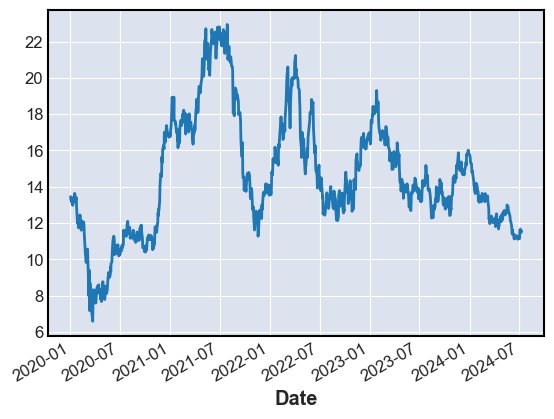

In [137]:
# Componentes do Gráfico
data['Close'].plot()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
data['SMA_20'] = data['Close'].rolling(window=20).mean()

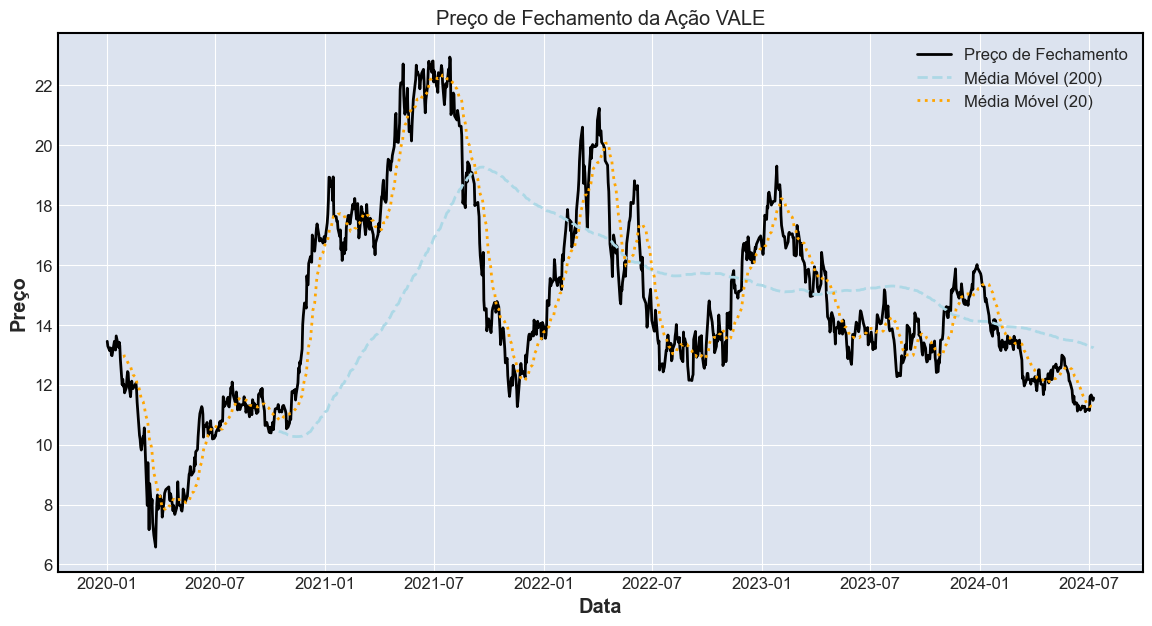

In [165]:
#Plotando o Gráfico
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Preço de Fechamento', color = 'black')
plt.plot(data['SMA_200'], linestyle='dashed', label="Média Móvel (200)", color = 'lightblue')
plt.plot(data['SMA_20'], linestyle='dotted', label="Média Móvel (20)", color = 'orange')
plt.title(f'Preço de Fechamento da Ação {ticker}')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.grid(True)
plt.legend()
plt.show()

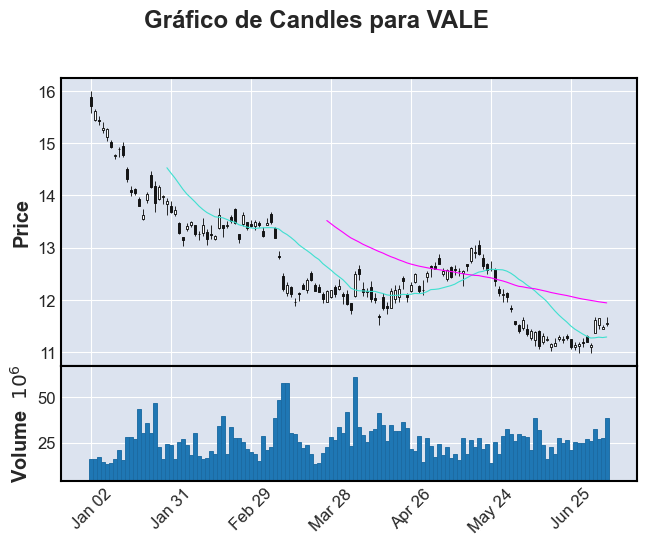

In [125]:
#Gráfico Candlestick
mpf.plot(data, type='candle', volume=True, title=f'Gráfico de Candles para {ticker}', mav=(20, 60))